In [1]:
import pandas as pd
import numpy as np

In [2]:
file = 'ted_main.csv'
df = pd.read_csv(file)

In [3]:
df.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


# TimeStamp

convert the timestamp columns [film_date, published_date] to normal dates with format yyyy-mm-dd
```
pd.to_datetime()
```



In [4]:
## your code here
df["film_date"] = pd.to_datetime(df["film_date"],unit = 's')
df["published_date"] = pd.to_datetime(df["published_date"],unit = 's')

In [5]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


**add a year column and a month column, extract them from the film date column**

In [6]:
# film_date
## date.year / date.month / date.day
print(df['film_date'][0])
print(df['film_date'][0].month)
print(df['film_date'][0].year)


2006-02-25 00:00:00
2
2006


In [7]:
## your code here
df["month"] = df['film_date'].apply(lambda x : x.month)
df["year"] = df['film_date'].apply(lambda x : x.year)

In [8]:
df.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,month,year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2,2006


# value counts

```
df['column_name'].value_counts()

```
**value_counts** : to count all the unique values in a column
the output is a series, where the index is the column unique values
and the main series is the counts


**plot the number of talks in each year, sorted from 1972 to 2017**

In [9]:
## your code here
year = df["year"].value_counts() 
year

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: year, dtype: int64

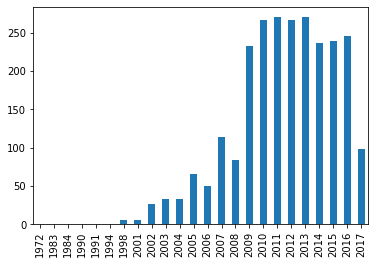

In [10]:
year = year.sort_index()
year.plot.bar()

In [11]:
year

1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: year, dtype: int64

**plot the heighest ten occupations of the speakers**

In [12]:
## your code here
occupation = df['speaker_occupation'].value_counts()
occupation

Writer                                      45
Designer                                    34
Artist                                      34
Journalist                                  33
Entrepreneur                                31
                                            ..
Global health and development specialist     1
Interaction designer; software developer     1
Author, publisher, education activist        1
Neuroscience and cancer researcher           1
Engineer and origamist                       1
Name: speaker_occupation, Length: 1458, dtype: int64

In [13]:
occupation[:10]

Writer          45
Designer        34
Artist          34
Journalist      33
Entrepreneur    31
Architect       30
Inventor        27
Psychologist    26
Photographer    25
Filmmaker       21
Name: speaker_occupation, dtype: int64

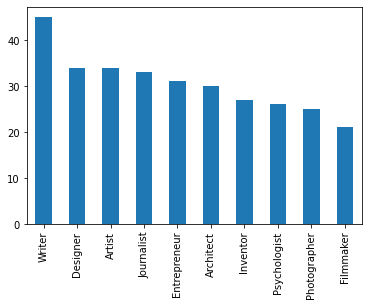

In [14]:
## the heighest ten occupations of the speakers
occupation[:10].plot.bar();

**plot the number of talks in each month through all the years**

In [15]:
## your code here

In [16]:
months = df["month"].value_counts()

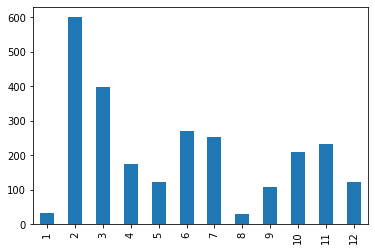

In [17]:
months = months.sort_index()
months.plot.bar();

In [18]:
months

1      33
2     601
3     397
4     173
5     123
6     270
7     253
8      30
9     107
10    208
11    232
12    123
Name: month, dtype: int64

**plot the number of published talks in each month**

*get the month of the published date*

In [20]:
df["month_P"] = df['published_date'].apply(lambda x : x.month)

In [42]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,month,year,month_P,Funny
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2,2006,6,19645
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2,2006,6,544
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2,2006,6,964
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2,2006,6,760
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2,2006,6,3202


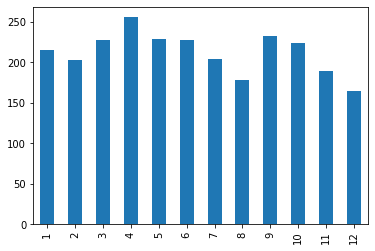

In [44]:
months = df["month_P"].value_counts().sort_index().plot.bar();

In [45]:
nums = df['num_speaker'].value_counts()
nums

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

**get the top 10 most appeared speakers in the talks**

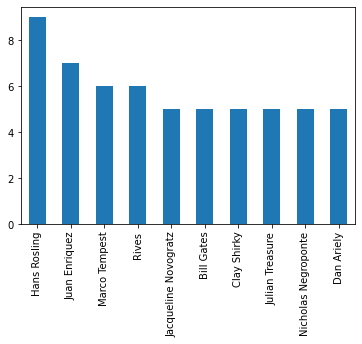

In [22]:
df["main_speaker"].value_counts()[:10].plot.bar()

**scatter plot the number of languages vs the number of views and comment on the results**

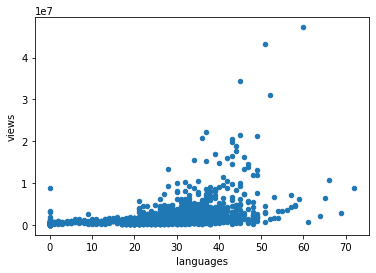

In [23]:
df.plot.scatter(x = 'languages', y = 'views');

**scatter plot the duration vs the number of views and comment on the results**

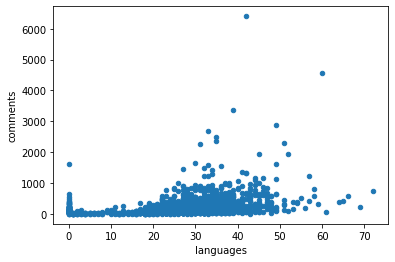

In [24]:
df.plot.scatter(x = 'languages', y = 'comments');


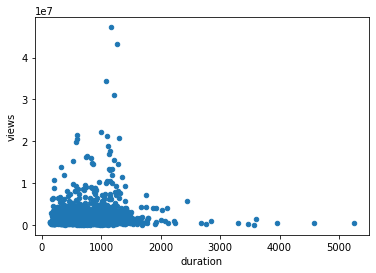

In [25]:
df.plot.scatter(x = 'duration', y = 'views');

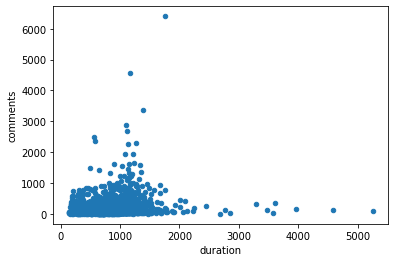

In [26]:
df.plot.scatter(x = 'duration', y = 'comments');

# Ratings



```
import ast
ast.literal_eval()
```



In [27]:
f = df['ratings'][0]
f

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [28]:
type(f)

str

In [29]:
import ast
f = ast.literal_eval(f)
f

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [30]:
type(f)

list

In [31]:
f['name' == 'Funny']['count']

19645

**apply literal_eval on ratings column to convert it from string to dictionary, then get the count of the funny ratings in each talk in a new column and name it 'Funny'**

In [32]:
##your code here
df['ratings'] = df['ratings'].apply(ast.literal_eval)

In [33]:
df["Funny"] = df["ratings"].apply(lambda x : x['name' == 'funny']['count'])

**the top 3 funny talks**

In [34]:
df.sort_values('Funny', ascending = False).head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,month,year,month_P,Funny
837,1927,Brené Brown studies human connection -- our ab...,1219,TEDxHouston,2010-06-06,52,Brené Brown,Brené Brown: The power of vulnerability,1,2010-12-23 14:45:00,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",Vulnerability researcher,"['TEDx', 'communication', 'culture', 'depressi...",The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...,31168150,6,2010,12,21444
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2,2006,6,19645
1030,1627,At his Stanford University commencement speech...,904,Stanford University,2005-06-12,0,Steve Jobs,Steve Jobs: How to live before you die,1,2011-10-06 02:42:00,"[{'id': 10, 'name': 'Inspiring', 'count': 1729...","[{'id': 848, 'hero': 'https://pe.tedcdn.com/im...",Visionary,"['business', 'computers', 'creativity', 'death...",How to live before you die,https://www.ted.com/talks/steve_jobs_how_to_li...,8744428,6,2005,10,17290


**scatter plot the Funny ratings count vs the number of views and comment on the results**

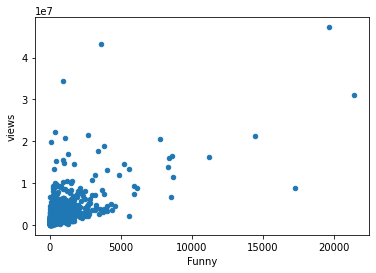

In [35]:
df.plot.scatter(x = 'Funny',y = 'views');

# Tags

**apply literal_eval on the tags column ang get the top 10 tags**

In [36]:
df['tags'][0]

"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']"

In [37]:
df['tags'] = df['tags'].apply(ast.literal_eval)
df['tags'][:3]

0    [children, creativity, culture, dance, educati...
1    [alternative energy, cars, climate change, cul...
2    [computers, entertainment, interface design, m...
Name: tags, dtype: object

In [38]:
s = []
for row in df.tags:
  for i in row:
    s.append(i)
tags = pd.Series(s)

In [39]:
tags

0              children
1            creativity
2               culture
3                 dance
4             education
              ...      
19149              play
19150     public spaces
19151           society
19152          software
19153    urban planning
Length: 19154, dtype: object

In [40]:
tags_count = tags.value_counts()
tags_count

technology       727
science          567
global issues    501
culture          486
TEDx             450
                ... 
evil               2
cloud              1
funny              1
skateboarding      1
testing            1
Length: 416, dtype: int64

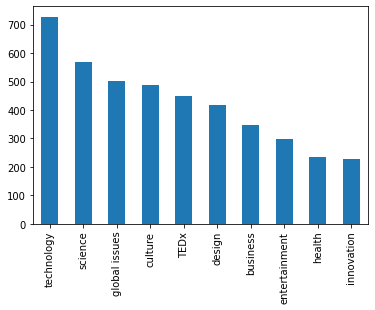

In [41]:
tags_count[:10].plot.bar()